# Developer tendencies in 2021 - A data based appproach

The analysis will be performed with the data obtained from the Stack Overflow survey performed each year. If want to check the information in detail please refer to: https://insights.stackoverflow.com/survey

## 1. Business understanding

Firstly, it is important to understand the value of the analysis and what are we trying to achieve. The main objective is to determine the developer tendencies in the last year considering the huge amount of changes the world has beeen experimenting with the pandemic. It will be really interesting to challenge our way of understanding the world versus what the data is telling.

## 2. Data understanding

It is really important to get to know the information we are getting and how we will be using it to get the most of the analysis that will be performed. The survey questions are divided into the 6 sections that are listed below: 

1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Demographic Information
6. Final Questions

The information that will be mainly used for the means of this analysis will be the from the first 3 points, as our analysis will be more focused on the technological tendencies realted to school education, ways of learning and the compensations with differente perspectives.

## Questions of interest

This project will perform an analysis on the developer tendencies regarding several aspects, where the main questons targeted to be answered are the next ones:

1. Which are the most used programming languages and which are the highest paid?
2. How does coding years either pro or rookie level correlates to salary?
3. Which way to learn gives the biggest salary?

In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from currency_converter import CurrencyConverter
c = CurrencyConverter()

%matplotlib inline

# Pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.options.display.max_rows = 100

# Plot settings
figure(figsize=(20, 14), dpi=80)

# Data import
survey_2021 = pd.read_csv('survey_results_public_2021.csv')

print("Survey 2021 columns: ", survey_2021.dtypes, "\n")
survey_2021.head(50)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=10.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

<Figure size 1600x1120 with 0 Axes>

In [7]:
# Values for sizes of plots

# Question 1 sizes
q1_width = 0.7
q1_figsize = (20,10)
q1_padding = 10

# Question 2 sizes
q2_width = 0.7
q2_figsize = (20,10)
q2_padding = 10

In [8]:
# Functions needed to implement

flag = 0
globaldf = pd.DataFrame()

def get_average_df(df, categorycolumn, averagecolumn, categoryname, averagename):
    
    '''
    returns a dataframe with the average values of a specified column
    
    INPUT: 
        categorycolumn: column/row of the category wanted to be averaged
        averagecolumn: column/row that will be averaged from the different categories of categorycolumn
        categoryname: category column name of the new dataframe
        averagename: averaged columnn name of the new dataframe
    
    OUTPUT:
        dataframe with the averaged values of the categories selected from a specific column
    '''
    
    global flag
    global globaldf
    
    if flag == 0:
        globaldf = pd.DataFrame(columns=[categoryname,'Count',averagename]) # Create dataframe
        flag = 1
    
    start_index = 0
    categories_count = categorycolumn.count(';') + 1 # Count the categories in the row
    
    for i in range(categories_count):
        
        if i!=0: 
            start_index = end_index + 1
        
        if i+1 == categories_count:
            end_index = len(categorycolumn)
        else:
            end_index = categorycolumn.find(';', start_index+1, len(categorycolumn))
            
        language = categorycolumn[start_index:end_index]

        if language in df.value_counts():
            df_index = globaldf.index[globaldf[categoryname] == language].tolist()
            globaldf[averagename][df_index] = (globaldf[averagename][df_index] + averagecolumn) / 2
            globaldf['Count'][df_index] = globaldf['Count'][df_index] + 1
        else:
            dict = {categoryname: language, 'Count': 1, averagename: averagecolumn}
            globaldf = globaldf.append(dict, ignore_index = True)
        
def get_monthly_compensation(frequency, compensation):
    
    '''
    returns the converted monthly compensation depending on the frequency given in the survey
    
    INPUT:
        frequency: value of the frequency in which people get payed
        compensation: value of the compensation received in the frequency specified
    
    
    OUTPUT:
        value of the monthy compensation according to the compensation frequency
    '''
    
    if frequency == 'Yearly':
        monthly_comp = compensation / 12
    elif frequency == 'Weekly':
        monthly_comp = compensation * 4
    else: 
        monthly_comp = compensation
        
    return monthly_comp

## 3. Data preparation 
Firstly, the dataset was reviewed to understand in detail the information we have and the data was cleaned.

To make the data cleaning of the dataset the next steps were followed:

1. Drop NAs of the compensation as it was going to be our independant variable
2. Convert all the currencies we have to USD as we have a huge amount of different currencies, for this a library called currency_converter was used
3. The compensaations were standarized to a monthly income as it had different compensation frequencies

In [9]:
# Data Cleaning

survey_2021.dropna(subset=['CompTotal','LanguageHaveWorkedWith','LearnCode'],inplace=True) # Drop NA's from compensation
survey_2021.drop(survey_2021[survey_2021.Currency == "none\tCook Islands dollar"].index, inplace=True) # Delete currency without acronym

survey_2021['CurrencyAcronim'] = survey_2021.apply(lambda row: row['Currency'][:3],axis=1) # Get only the currency acronim for conversion
survey_2021.drop(survey_2021[~survey_2021.CurrencyAcronim.isin(c.currencies)].index, inplace=True) # Delete non supported currencies for conversion

survey_2021['MonthlyCompensation'] = survey_2021.apply(lambda row: get_monthly_compensation(row['CompFreq'], row['CompTotal']), axis=1) # Get monthly compensation
survey_2021['USDCompensation'] = survey_2021.apply(lambda row: c.convert(row['MonthlyCompensation'],row['CurrencyAcronim'],'USD'), axis=1) # Get USD compensation

survey_2021['YearsCodePro'] = survey_2021['YearsCodePro'].astype('str')

# Dropping unrealistic monthly compensations
survey_2021 = survey_2021[survey_2021['USDCompensation'] < 1000000]

## 4. Evaluation of visualziations and results

### Question 1

#### Which are the most used programming languages and which are the highest paid?

To make the analysis of question 1, a new dataframe was created with the average compensation of the different languages using the whole dataset. 

Then the dataframe was normalized to make a comparison between all the different languages

In [10]:
survey_2021.apply(lambda row: get_average_df(globaldf, row['LanguageHaveWorkedWith'],row['USDCompensation'],
                                                 'Language','Average compensation'), axis=1)

# Assignation of the global df to the dataframe that will be used to make our analysis
language_df = globaldf

# Get a copy of the df to analyze the actual values
language_df_nn = language_df

# Normalization of values
language_df[['Count', 'Average compensation']] = language_df[['Count', 'Average compensation']].apply(
    lambda column: (column - column.min()) / (column.max() - column.min()))

# Reset globaldf
flag = 0

#### Graph in descendant order by average compensation

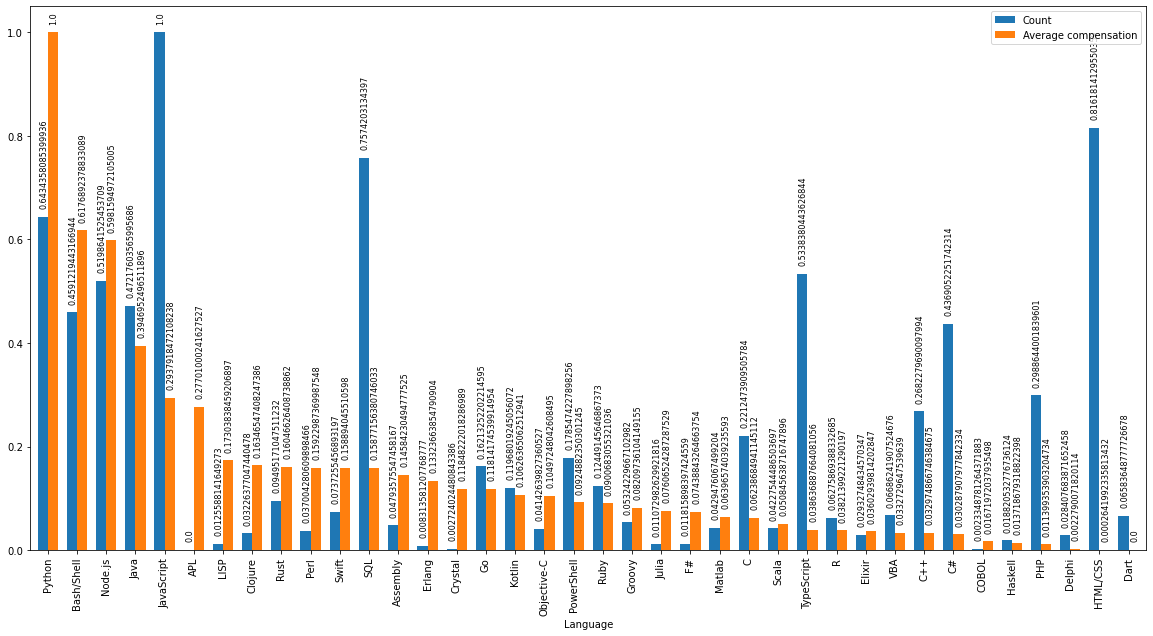

In [6]:
# Figure creation
fig1, ax1 = plt.subplots()

# Organizing by average compensation
language_df.sort_values(by=['Average compensation'], inplace=True, ascending=False)

# Plotting a grouped bar chart
language_df.plot(x='Language', y=['Count','Average compensation'], kind='bar', width=q1_width, figsize=q1_figsize, ax=ax1)

# Adding values to the graph
for p in ax1.patches:
    an = ax1.annotate(str(p.get_height()), xy=(p.get_x()+0.06, p.get_height()+0.02))
    an.set_size(8)
    an.set_rotation(90)

#### Graph in descendant order by amount of people that uses each programming language

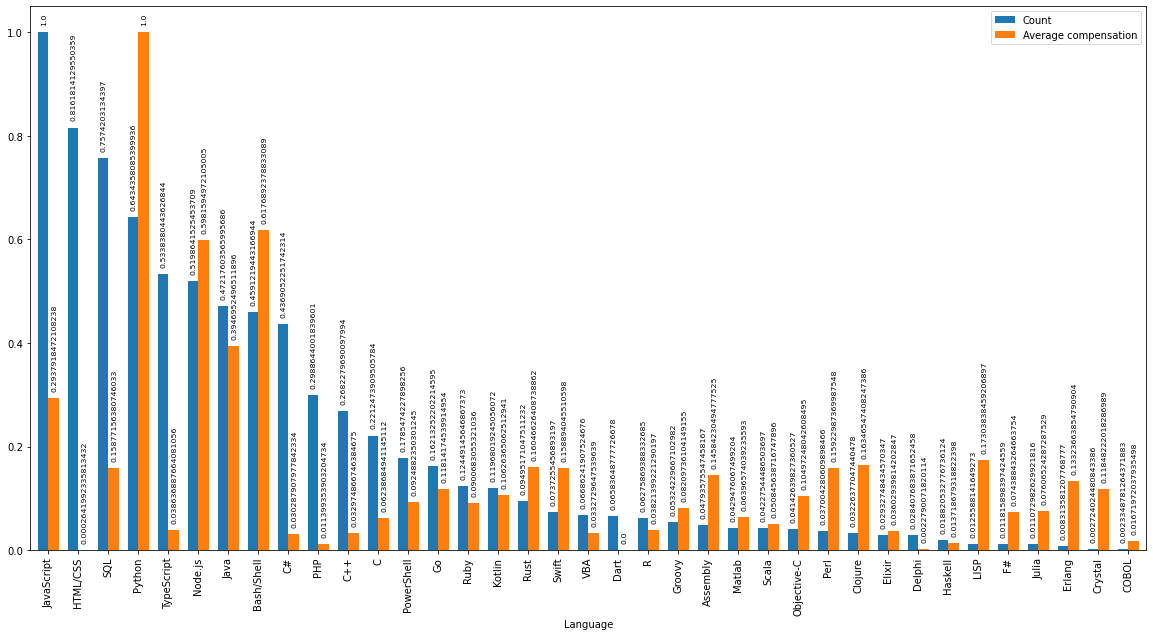

In [11]:
# Figure creation
fig_languages3, ax_languages3 = plt.subplots()

# Plotting a grouped bars chart with count of people using it and average compensation
language_df2.plot(x='Language', y=['Count','Average compensation'], kind='bar', ax = ax_languages3, width=q1_width, figsize=q1_figsize)

# Adding values to the graph
for p in ax_languages3.patches:
    an = ax_languages3.annotate(str(p.get_height()), xy=(p.get_x()+0.1, p.get_height()+0.015))
    an.set_size(7.8)
    an.set_rotation(90)

NameError: name 'language_df' is not defined

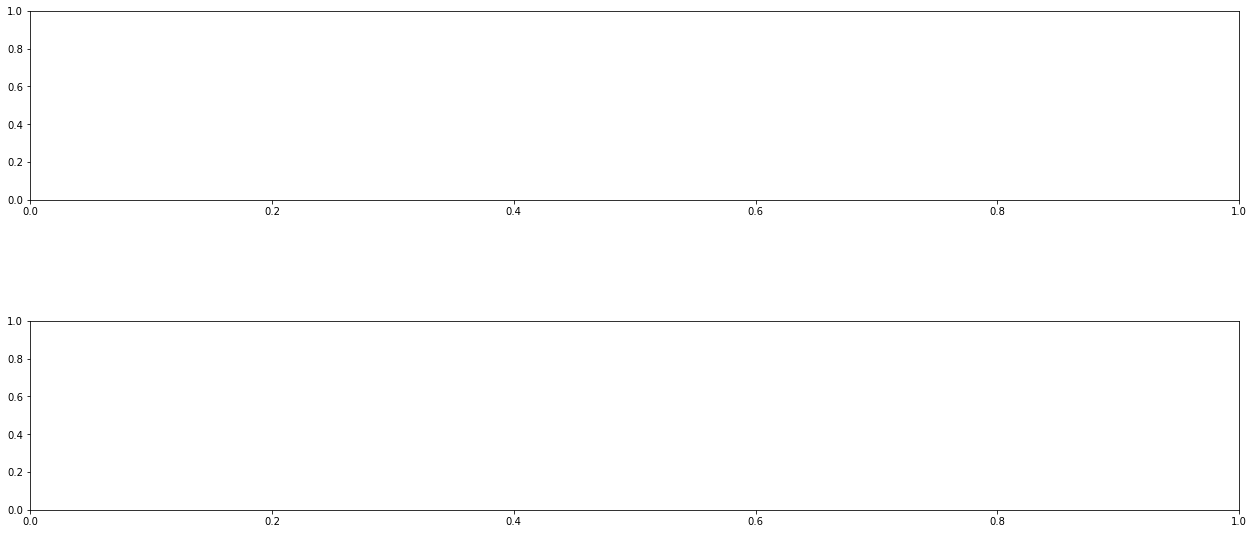

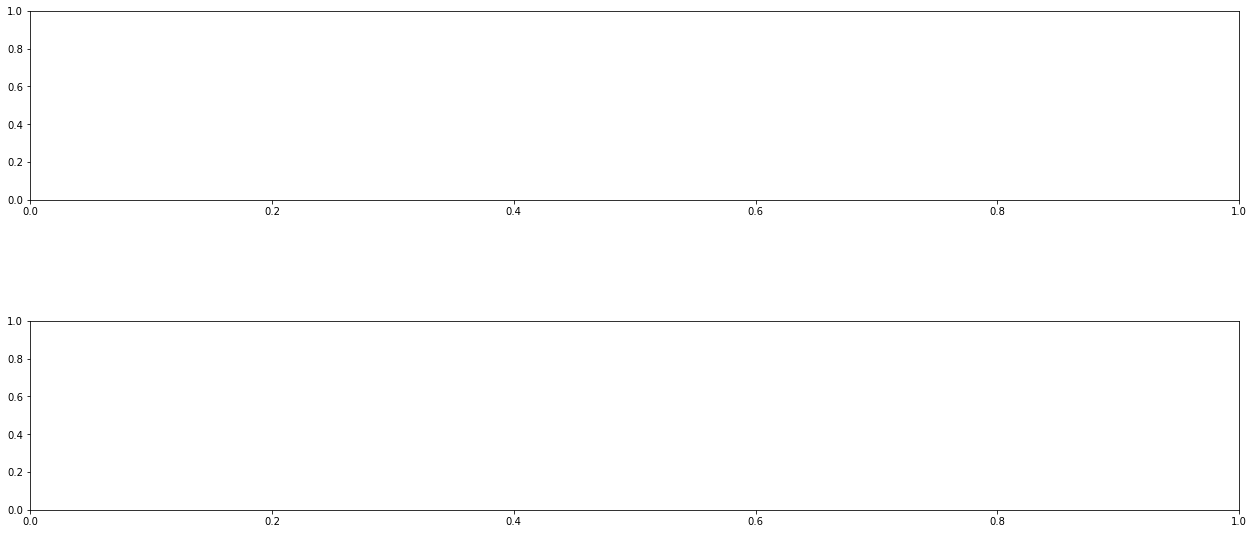

In [5]:
# Figure creation
fig_languages, ax_languages = plt.subplots(2, 1, figsize=q1_figsize)
fig_languages.tight_layout(pad=q1_padding)

fig_languages2, ax_languages2 = plt.subplots(2, 1, figsize=q1_figsize)
fig_languages2.tight_layout(pad=q1_padding)

# Dropping APL language as it has a gigantic value in comparison with others
language_df2 = language_df.drop(language_df[language_df['Language'] == "APL"].index)

# Plotting in order by best compensated language
language_df2.plot(x='Language', y=['Count','Average compensation'], kind='bar', width=q1_width, figsize=q1_figsize, ax=ax_languages, subplots=True)

# Copying last dataframe to plot in order by most people using a language
language_df3 = language_df2
language_df3.sort_values(by=['Count'], inplace=True, ascending=False)
language_df3.plot(x='Language', y=['Count','Average compensation'], kind='bar', width=q1_width, figsize=q1_figsize, ax=ax_languages2, subplots=True)

### Question 1 conclusions

From the graphs obtained above, it can be observed how the top 7 most used programming languages represent the highest salaries excluding HTML/CSS and Typescript, which have a really low average compensation when compared to the others. This could be due to the level of the expertise required for the programming languages or the availability of people with expertise.

### Question 2

#### How does coding years either pro or rookie level correlates to salary?

To analyze this question a correlation was performed with the columns needed

In [12]:
# Functions needed

# Create dummy columns for the. categorical columns in order to get the correlation
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    returns a dataframe with dummy columns to be able to get the correlation
    
    INPUT:
        df - pandas dataframe with categorical variables you want to dummy
        cat_cols - list of strings that are associated with names of the categorical columns
        dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
        df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=10.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



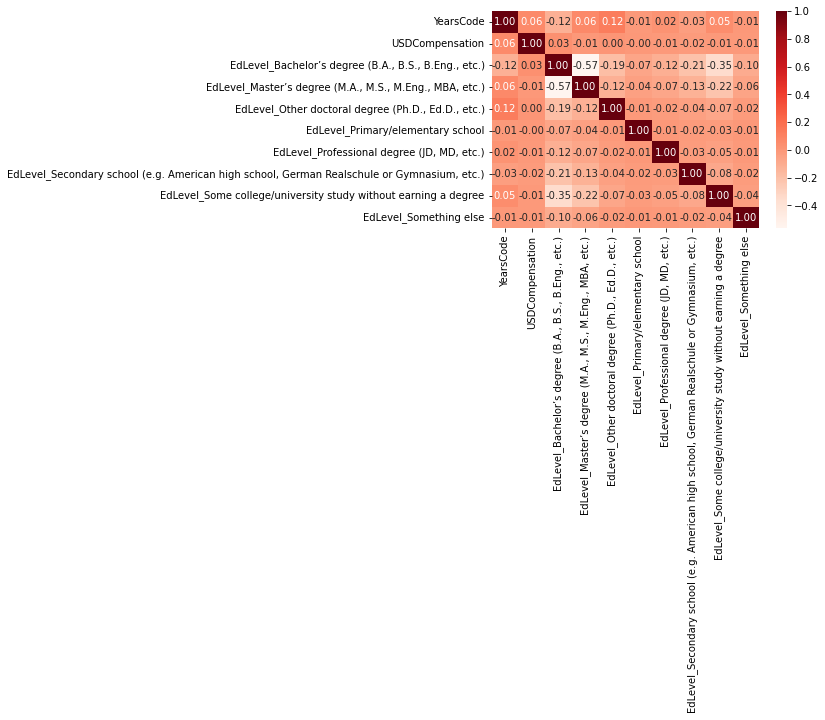

In [27]:
# Generate new dataframe
q2_df = survey_2021[['EdLevel','YearsCode','YearsCodePro','USDCompensation']]

# Data cleaning
q2_df.dropna(subset=['EdLevel','YearsCode','YearsCodePro'], inplace=True)

q2_df.replace('Less than 1 year', 0, inplace=True)
q2_df.replace('More than 50 years', 51, inplace=True)

# Create df with dummy columns for the Education Level to be analyzed with the correlation function
q2_df2 = create_dummy_df(q2_df, ['EdLevel'], False)

# Change column type as YearsCode and YearsCodePro are object type
q2_df2['YearsCode'] = q2_df2['YearsCode'].astype('int64')
#q2_df2['YearsCodePro'] = q2_df2['YearsCodePro'].astype('int64')
q2_df2['USDCompensation'] = q2_df['USDCompensation']#.astype('int32')

#MonthlyCompensation
q2_df2.head()

sns.heatmap(q2_df2.corr(), annot=True, fmt=".2f", cmap="Reds");

### Question 2 conclusions

From the confusion matrix presented above, it can be observed how the monthly compesation has almost zero correlation with the education level and the coding years. Hence, the education level is no longer a determining factor on how much you can earn nowadays.

### Question 3

#### Which way to learn gives the biggest salary?

To answer this question a new normalized dataframe was obatained with the average salary and count of people of each way of learning. Where the normalization was performed from the minimun to maximumn values, being -1 the smaller value and 1 the biggest one.

In [28]:
def normalization_learning2(value, column_mean, column_min, column_max):
    '''
    returns a normalized value depending on the mean, maximum and minimum values given
    
    INPUT:
        value: value to be normalized
        column_mean: mean value of the column to be normalized
        column_min: minimum value of the column to be normalized
        column_max: maximum value of the column to be normalized
    
    OUTPUT:
        normalized value depending on the inputs
        
    '''
    
    if(value == column_max):
        return 1
    
    elif(value == column_min):
        return -1
    
    elif(value > column_mean):
        diff = column_max - column_mean
        val_diff = column_max - value
        result = val_diff / diff
        
        if(result > 0):
            return 1 - result
        elif(result < 0):
            return -1 - result
        
    elif(value < column_mean):
        diff = column_mean - column_min
        val_diff = column_min - value
        result = val_diff / diff
        
        if(result > 0):
            return 1 - result
        elif(result < 0):
            return -1 - result
    
    else:
        return 0

In [16]:
survey_2021.apply(lambda row: get_average_df(globaldf, row['LearnCode'],row['USDCompensation'],
                                                 'Way to Learn','Average compensation'), axis=1)

# Assignation of the global df to the dataframe that will be used to make our analysis
learning_df = globaldf

# Get a copy of the df to analyze the actual values
learning_df_nn = learning_df

# Reset globaldf
flag = 0

In [29]:
# Normalization considering 0 as the mean, -1 as the minimun and 1 as the maximum

# Get the averages, minimums and maximums
count_mean = learning_df['Count'].mean()
count_min = learning_df['Count'].min()
count_max = learning_df['Count'].max()

avg_mean = learning_df['Average compensation'].mean()
avg_min = learning_df['Average compensation'].min()
avg_max = learning_df['Average compensation'].max()

# Normalize the average compensation
learning_df['Average compensation'] = learning_df['Average compensation'].apply(
    normalization_learning2, args=(avg_mean, avg_min, avg_max))

# Normalize the count
learning_df['Count'] = learning_df['Count'].apply(
    normalization_learning2, args=(count_mean, count_min, count_max))

#### Display of the dataframe normalized

In [30]:
display(learning_df)

,Way to Learn,Count,Average compensation
0,Coding Bootcamp,-1.000000,-0.952920
1,"Other online resources (ex: videos, blogs, etc)",0.923271,0.242791
2,School,1.000000,-0.901471
3,Friend or family member,-0.588956,1.000000
4,Other (please specify):,-0.998175,-0.956490
5,Online Courses or Certification,0.200287,0.405851
6,Online Forum,-0.055835,0.228368
7,Colleague,-0.572226,-1.000000
8,Books / Physical media,0.918310,0.276745


,Way to Learn,Count,Average compensation
0,Coding Bootcamp,-1.000000,-0.952920
1,"Other online resources (ex: videos, blogs, etc)",0.923271,0.242791
2,School,1.000000,-0.901471
3,Friend or family member,-0.588956,1.000000
4,Other (please specify):,-0.998175,-0.956490
5,Online Courses or Certification,0.200287,0.405851
6,Online Forum,-0.055835,0.228368
7,Colleague,-0.572226,-1.000000
8,Books / Physical media,0.918310,0.276745


'\nfor p in ax_languages4.patches:\n    an = ax_languages4.annotate(str(p.get_height()), xy=(p.get_x()+0.1, p.get_height()+0.015))\n    an.set_size(7.8)\n    an.set_rotation(90)\n'

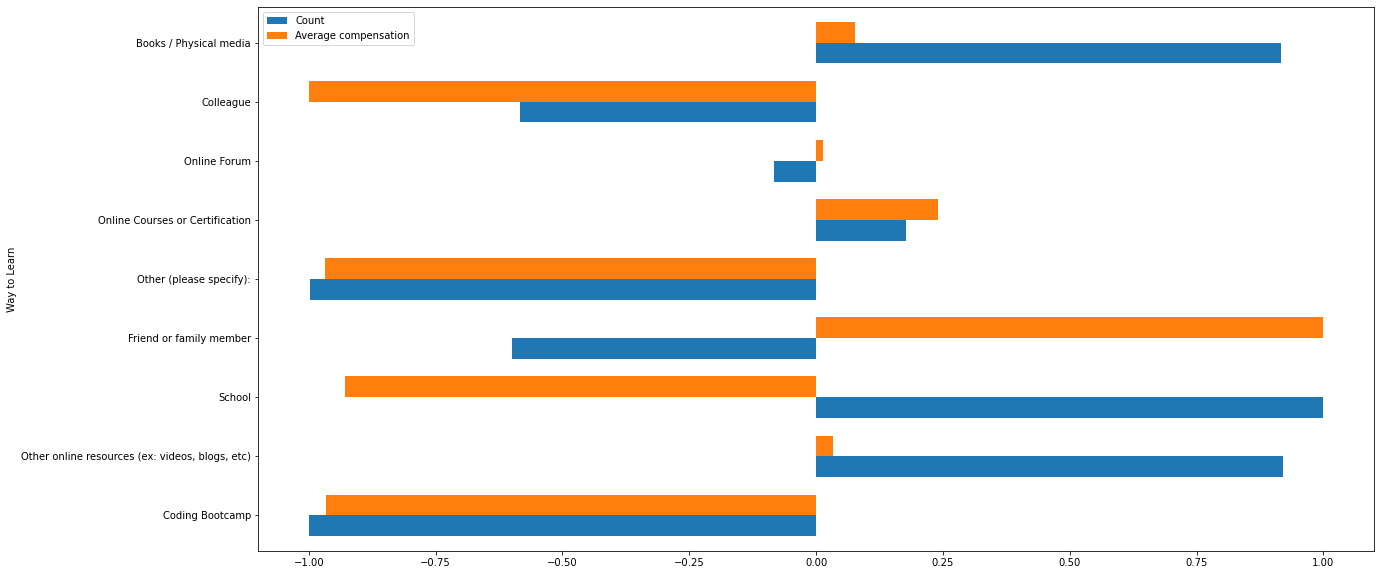

In [20]:
# Figure creation
fig_languages4, ax_languages4 = plt.subplots()

# Plotting a grouped bars chart with count of people using it and average compensation
learning_df.plot(x='Way to Learn', y=['Count','Average compensation'], kind='barh', ax = ax_languages4, width=q1_width, figsize=q1_figsize)

### Question 3 conclusions

From the plot obtained, it can be observed that curiously the biggest salaries come from people who learned from friend or familiy members and the lowest come from learning from other colleagues. Additionally, it can be observed that most people learned through school, nevertheless that doesn’t represent the highest salaries, which complements the analysis obtained for the second question.